In [1]:
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from skimage import measure, data, io
from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label
from skimage.morphology import closing, square
from skimage.measure import regionprops
from skimage.color import label2rgb
from skimage.color import rgb2gray

In [2]:
image = imread('1.jpg')
gray_image = rgb2gray(image)

In [3]:
# apply threshold
thresh = threshold_otsu(gray_image)
bw = closing(gray_image > thresh, square(3))

In [4]:
# remove artifacts connected to image border
cleared = bw.copy()
clear_border(cleared)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [5]:
# label image regions
label_image = label(cleared)
#image_label_overlay = label2rgb(label_image, image=image)

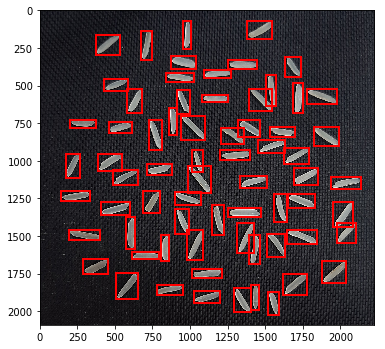

In [6]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
ax.imshow(image)
#plt.show()
for region in regionprops(label_image):

    # skip small images
    if region.area < 100:
        continue

    # draw rectangle around segmented coins
    minr, minc, maxr, maxc = region.bbox
    minr, minc, maxr, maxc = (minr-5, minc-5, maxr+5, maxc+5)
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

plt.show()